In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
import joblib
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join("..", "src")))
from scaling import *
from feature_selectors import *
from modeling import *



We will begin our model testing by splitting data into train and test parts.

In [2]:
df=pd.read_csv('../data/train.csv')
processing_pipeline = joblib.load('../pipelines/text_pipeline.joblib')

c:\Users\micha\anaconda3\envs\wb\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [3]:
y = df['target']
X = df.drop(columns=['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
#text preprocessing and new column adding pipeline
processing_pipeline.fit_transform(X_train)
processing_pipeline.transform(X_test)

,id,keyword,location,text,count_caps_lock,count_exclamation_mark,count_hashtags,count_words,count_punctuation,count_links,...,negative,anticipation,positive,fear,joy,trust,disgust,processed_text,processed_text_str,mention_god_related
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,0,0,0,11,2,0,...,1,0,0,0,0,0,0,"[new, weapon, cause, unimaginable, destruction]",new weapon cause unimaginable destruction,0
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,2,0,1,21,10,0,...,1,0,0,1,0,0,0,"[famp, thing, gishwhes, get, soak, deluge, go,...",famp thing gishwhes get soak deluge go pad tam...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,2,0,0,15,13,1,...,0,0,1,1,0,1,0,"[dt, rt, ûïthe, col, police, catch, pickpocket...",dt rt ûïthe col police catch pickpocket liverp...,0
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,1,0,0,21,3,0,...,1,0,0,0,0,1,0,"[aftershock, back, school, kick, great, want, ...",aftershock back school kick great want thank e...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0,0,0,17,3,0,...,1,1,1,1,0,0,0,"[response, trauma, child, addict, develop, def...",response trauma child addict develop defensive...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,2640,crashed,Somewhere,@SmusX16475 Skype just crashed u host,0,0,0,6,1,0,...,1,0,1,1,1,1,1,"[skype, crash, u, host]",skype crash u host,0
506,731,attacked,Arundel,Christian Attacked by Muslims at the Temple Mo...,0,0,0,18,9,1,...,1,0,1,1,1,1,1,"[christian, attack, muslim, temple, mount, wav...",christian attack muslim temple mount wave isra...,0
3592,5131,fatal,"New South Wales, Australia",Man charged over fatal crash near Dubbo refuse...,0,0,0,12,6,1,...,1,0,0,0,0,0,0,"[man, charge, fatal, crash, near, dubbo, refus...",man charge fatal crash near dubbo refuse bail via,0
6740,9657,thunderstorm,NaN,#usNWSgov Severe Weather Statement issued Augu...,7,0,1,18,14,1,...,1,0,1,1,1,1,1,"[usnwsgov, severe, weather, statement, issue, ...",usnwsgov severe weather statement issue august...,0


# MODEL TESTING

We will test these models and vectorizers:
- Models:
    - Random Forest
    - SVM
    - Logistic Regression
    - Multinomial NB
- Vectorizers:
    - Count Vectorizer
    - CBow
    - Tfidf Vectorizer
    - Skipgram Vectorizer


In [5]:
columns_to_remove = ['keyword', 'location', 'processed_text', 'text', 'emotions']
X_train = X_train.drop(columns=columns_to_remove)
X_test = X_test.drop(columns=columns_to_remove)

In [6]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1523 entries, 2644 to 1634
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1523 non-null   int64  
 1   count_caps_lock         1523 non-null   int64  
 2   count_exclamation_mark  1523 non-null   int64  
 3   count_hashtags          1523 non-null   int64  
 4   count_words             1523 non-null   int64  
 5   count_punctuation       1523 non-null   int64  
 6   count_links             1523 non-null   int64  
 7   count_stopwords         1523 non-null   int64  
 8   count_mentions          1523 non-null   int64  
 9   count_verbs             1523 non-null   int64  
 10  count_nouns             1523 non-null   int64  
 11  count_adjectives        1523 non-null   int64  
 12  count_adverbs           1523 non-null   int64  
 13  polarity                1523 non-null   float64
 14  subjectivity            1523 non-null   fl

### Running models using RandomSearch to find the best tuned model

In [8]:
results = run_vectorizer_model(vectorizers, X_train, X_test, y_train, y_test, models, param_grid)

Processing CBow vectorizer:  62%|██████▎   | 60/96 [04:36<02:45,  4.61s/it]                                         


In [9]:
results_df1 = pd.DataFrame(results)
sorted_df1 = results_df1.sort_values(by='F1-Score', ascending=False)

Here we can see that Count vectorizer with SVM has the best f1-score = 0.8

In [10]:
sorted_df1.head(10)

,Vectorizer,Model,Max Features,N-gram Range,Accuracy,Precision,Recall,F1-Score
37,Count,SVM,3000.0,"(1, 1)",0.804990,0.809295,0.804990,0.800932
34,Count,SVM,2000.0,"(1, 2)",0.800394,0.803895,0.800394,0.796463
22,Tfidf,SVM,3000.0,"(1, 2)",0.799081,0.801923,0.799081,0.795388
38,Count,Logistic Regression,3000.0,"(1, 1)",0.795798,0.795251,0.795798,0.794206
11,Tfidf,Logistic Regression,2000.0,"(1, 1)",0.795798,0.796464,0.795798,0.793152
32,Count,Logistic Regression,2000.0,"(1, 1)",0.795141,0.795224,0.795141,0.792896
23,Tfidf,Logistic Regression,3000.0,"(1, 2)",0.795141,0.795963,0.795141,0.792371
6,Tfidf,SVM,1000.0,"(1, 2)",0.793828,0.793266,0.793828,0.792188
36,Count,Random Forest,3000.0,"(1, 1)",0.792515,0.791785,0.792515,0.791915
19,Tfidf,Logistic Regression,3000.0,"(1, 1)",0.794485,0.795106,0.794485,0.791822


Let's see if adding additional features will improve the performance of the best scoring model

In [11]:
#pipeline to add new selected features
pipeline1 = Pipeline([('first_feature_selection',FirstFeatureSelector())])
X_train_1 = pipeline1.fit_transform(X_train)
X_test_1 = pipeline1.fit_transform(X_test)

In [12]:
from scipy.sparse import hstack, csr_matrix
vectorizer = CountVectorizer(max_features=3000, ngram_range=(1,1))
X_text = vectorizer.fit_transform(X_train_1['processed_text_str'])
X_text_test = vectorizer.transform(X_test_1['processed_text_str']) # the same transformations for text df
print(X_train_1.columns)
columns = ['count_caps_lock', 'count_exclamation_mark','positive', 'polarity', 'count_links', 'count_mentions', 'count_nouns']

additional_features = csr_matrix(X_train_1[columns].values)
additional_features_test = csr_matrix(X_test_1[columns].values)

X_combined = hstack([X_text, additional_features])
X_test_combined =hstack([X_text_test, additional_features_test])

params = param_grid["SVM"]
param_dist = {key: [value] if isinstance(value, int) else value for key, value in params.items()}
random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=5, cv=3, scoring='f1', n_jobs=-1)
random_search.fit(X_combined, y_train)
    
best_estimator = random_search.best_estimator_
print(random_search.best_params_)


Index(['processed_text_str', 'count_caps_lock', 'count_exclamation_mark',
       'positive', 'polarity', 'count_links', 'count_mentions', 'count_nouns'],
      dtype='object')
{'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}


In [13]:
from sklearn.metrics import f1_score
predictions = best_estimator.predict(X_test_combined)
print("f1 score:", f1_score(predictions,y_test))

f1 score: 0.7517006802721088


F1 score after adding new features slightly dropped. It can be caused by other Randomized Search parameters but also new columns can act like a 'noise' for our model. 

As the performance didn't improve it is better to **keep the model simple**, so we will not add those columns.

## Keras Model

In [35]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, f1_score


Let's read data once again

In [77]:
df = pd.read_csv("../data/train.csv")
y = df['target']
X = df['text']  

In [78]:
vocab_size = 10000  
maxlen = 200  

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=maxlen)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [80]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [81]:
BATCH_SIZE = 16
train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [82]:
embed_dim = 16  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 16  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(1, activation="sigmoid")(x) 

In [83]:
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(train_dataset,epochs=3, validation_data=test_dataset)

test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

Epoch 1/3


405/405 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5407 - loss: 0.6933 - val_accuracy: 0.5701 - val_loss: 0.6804
Epoch 2/3
405/405 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6505 - loss: 0.6189 - val_accuracy: 0.7863 - val_loss: 0.4725
Epoch 3/3
405/405 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8674 - loss: 0.3370 - val_accuracy: 0.8012 - val_loss: 0.4808
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7928 - loss: 0.4843
Test Loss: 0.4807977080345154, Test Accuracy: 0.8012259006500244


In [84]:

y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Generate classification report
print(classification_report(y_test, y_pred, digits=4))

f1 = f1_score(y_pred,y_test)
print(f"F1 Score: {f1:.4f}")
# Optionally, evaluate the model
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
              precision    recall  f1-score   support

           0     0.7880    0.8909    0.8363       651
           1     0.8251    0.6823    0.7469       491

    accuracy                         0.8012      1142
   macro avg     0.8066    0.7866    0.7916      1142
weighted avg     0.8040    0.8012    0.7979      1142

F1 Score: 0.7469
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7928 - loss: 0.4843
Test Loss: 0.4807977080345154, Test Accuracy: 0.8012259006500244


We can see that f1-score is not better than standard ML

# Model interpreation:

In [ ]:
import shap
model = best_estimator
vectorizer = CountVectorizer(max_features=3000, ngram_range=(1,1))

X_train_transformed = vectorizer.fit_transform(X_train['processed_text_str']).toarray()
X_test_transformed = vectorizer.transform(X_test['processed_text_str']).toarray()

model.fit(X_train_transformed, y_train)

feature_names = vectorizer.get_feature_names_out()
explainer = shap.Explainer(model, X_train_transformed, feature_names=feature_names)
shap_values = explainer(X_test_transformed)
print(shap_values.shape)

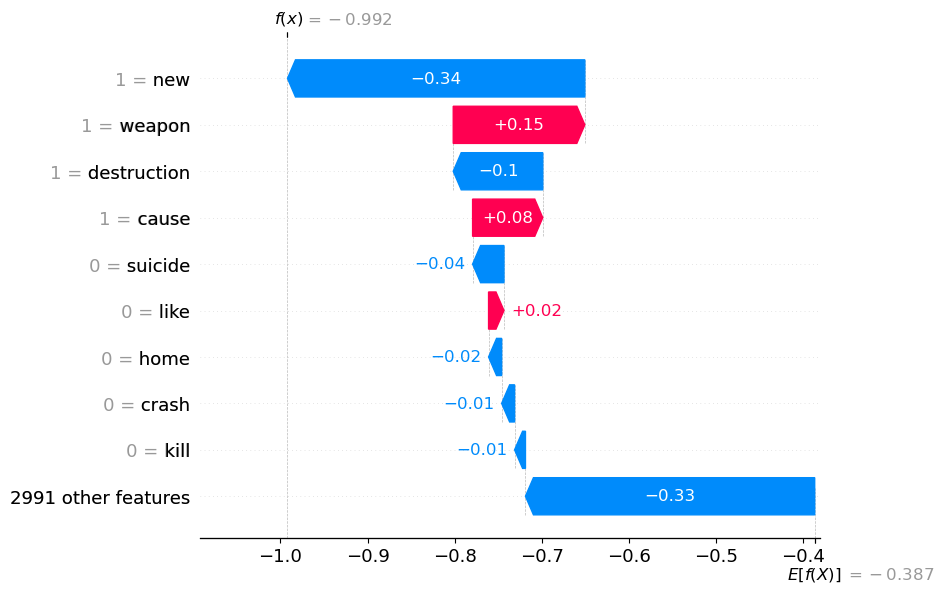

In [58]:
shap.initjs()
shap.plots.waterfall(shap_values[0])

In [64]:
X_test.head(1)

,id,count_caps_lock,count_exclamation_mark,count_hashtags,count_words,count_punctuation,count_links,count_stopwords,count_mentions,count_verbs,...,anticipation,joy,positive,negative,disgust,anger,surprise,fear,processed_text_str,mention_god_related
2644,3796,0,0,0,11,2,0,5,0,2,...,0,0,0,1,0,1,0,0,new weapon cause unimaginable destruction,0


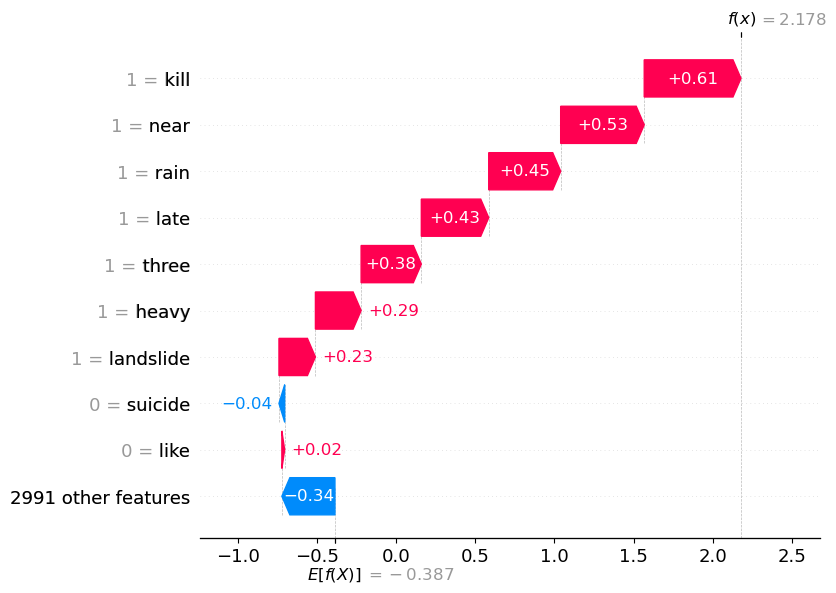

In [62]:
shap.plots.waterfall(shap_values[150])